# **Olah data untuk Visualisasi**

## *Data Preprocessing*

In [ ]:
import pandas as pd
import json
import pytz
import numpy as np

# Load the JSON file into a DataFrame
with open('/content/data-sample.json', 'r') as file:
    data = json.load(file)
df = pd.json_normalize(data)

# Changed Dtype
## Fix the date collumn
df['taskCreatedTime'] = pd.to_datetime(df['taskCreatedTime'])
df['taskCompletedTime'] = pd.to_datetime(df['taskCompletedTime'], utc=True)
timezone_offset = pytz.FixedOffset(7 * 60)  # +7:00 offset in minutes
df['taskCompletedTime'] = df['taskCompletedTime'].dt.tz_convert(timezone_offset)

## Fix weight and cod collumn
df['UserVar.weight'] = df['UserVar.weight'].astype(float)
df['cod.amount'].fillna(0, inplace=True)
df['cod.amount'] = df['cod.amount'].astype(int)
df['cod.amount'] = df['cod.amount'].replace(0, np.nan)
df['cod.received'] = np.where(df['cod.amount'].isnull(), np.nan, df['cod.received'])
df['cod.received'] = np.where(df['cod.amount'].isnull(), np.nan, df['cod.received'])
df['cod.received'] = df['cod.received'].astype(str)

# Make Duration Task Collumn
df['taskDuration'] = df['taskCompletedTime'] - df['taskCreatedTime']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8334 entries, 0 to 8333
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype                                
---  ------                         --------------  -----                                
 0   taskCreatedTime                8334 non-null   datetime64[ns, pytz.FixedOffset(420)]
 1   taskAssignedTo                 8333 non-null   object                               
 2   taskCompletedTime              7566 non-null   datetime64[ns, pytz.FixedOffset(420)]
 3   taskStatus                     8334 non-null   object                               
 4   flow                           8334 non-null   object                               
 5   taskId                         8334 non-null   object                               
 6   taskLocationDone.lon           7566 non-null   float64                              
 7   taskLocationDone.lat           7566 non-null   float64                        

In [ ]:
df.describe()

,taskLocationDone.lon,taskLocationDone.lat,cod.amount,UserVar.weight,taskDuration
count,7566.000000,7566.000000,2.358000e+03,8334.000000,7566
mean,75.355852,-3.610514,1.911411e+05,2.448298,0 days 01:12:50.355802273
std,52.492016,3.647171,2.723770e+05,6.188171,0 days 01:40:52.779119213
min,0.000000,-10.493658,8.370000e+02,0.000000,0 days 00:00:15
25%,0.000000,-7.061575,6.100000e+04,1.000000,0 days 00:09:59.750000
50%,106.843097,-3.329263,1.533750e+05,1.000000,0 days 00:37:15.500000
75%,112.182877,0.000000,2.350000e+05,1.600000,0 days 01:22:07.250000
max,140.806424,5.564040,4.730000e+06,202.500000,0 days 13:16:00


In [ ]:
df

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus,taskDuration
0,2022-11-01 20:17:26+07:00,pacifiedLion0,2022-11-01 20:46:30+07:00,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13.000,CGK,COLF01,0 days 00:29:04
1,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 12:33:48+07:00,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.300,CGK,COLF01,0 days 03:52:41
2,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 13:41:57+07:00,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3.000,CGK,COLF01,0 days 05:00:50
3,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 18:18:19+07:00,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01,0 days 09:37:12
4,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 10:51:49+07:00,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3.000,CGK,COLF01,0 days 02:10:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,2022-11-10 09:07:12+07:00,debonairPonie1,2022-11-10 09:38:04+07:00,done,Delivery,501af4e040a742e9e878,0.000000,0.000000,NaN,nan,CGK,Success,"PALMERAH ,JAKARTA BA",ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1.000,CGK,COLF01,0 days 00:30:52
8330,2022-11-10 09:21:42+07:00,murkyThrushe3,2022-11-10 09:37:52+07:00,done,Delivery,5cc952d9e9f8066dbf24,110.352054,-7.892571,NaN,nan,JOG,Failed,KOTA BANTUL,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL,U01,1.000,TGR,COLF02,0 days 00:16:10
8331,2022-11-10 09:36:44+07:00,enragedCake7,2022-11-10 09:37:55+07:00,done,Delivery,1b136b5a3c60749eb571,105.664897,-5.359063,NaN,nan,TKG,Success,MARGA SEKAMPUNG KAB.,YANG BERSANGKUTAN,D01,1.440,CGK,COLF01,0 days 00:01:11
8332,2022-11-10 07:25:40+07:00,lyingPaella2,2022-11-10 09:37:53+07:00,done,Delivery,e92e813c8539080c922e,119.877173,-8.513305,151000.0,False,KOE,Failed,"KOMODO,LABUAN BAJO",PENERIMA PINDAH ALAMAT,U03,0.600,CGK,COLF02,0 days 02:12:13


## Exploratory Analysis

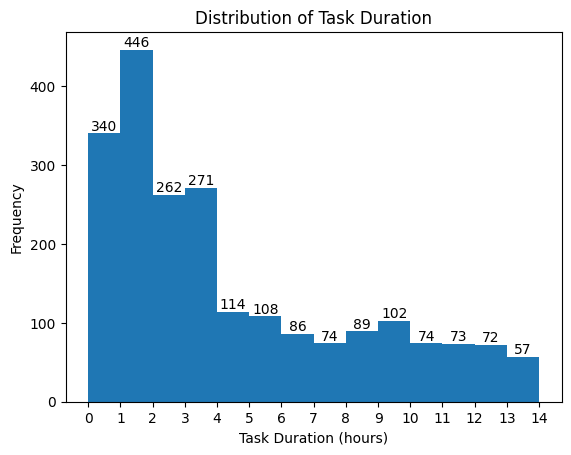

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert task duration to minutes
df['taskDuration_minutes'] = df['taskDuration'].dt.total_seconds() / 60

# Set the bin edges in hours
bin_edges = np.arange(0, (df['taskDuration_minutes'].max() + 60) / 60, 1)

# Plot histogram
counts, _, _ = plt.hist(df['taskDuration_minutes'], bins=bin_edges)

# Adding labels and title
plt.xlabel('Task Duration (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Task Duration')

# Set x-axis ticks to represent each 1-hour interval
plt.xticks(bin_edges)

# Add bar values as annotations
for count, x in zip(counts, bin_edges[:-1]):
    plt.text(x + (bin_edges[1] - bin_edges[0]) / 2, count, str(int(count)),
             ha='center', va='bottom')

# Display the plot
plt.show()


Pada grafik di atas terlihat sebaran data task duration paling tinggi frekuensinya berada pada rentang dari 0 hingga 4 jam. Sedangkan yang lainnya berada di rentang 4 hingga 14 jam paling lama termasuk yang masih on going.

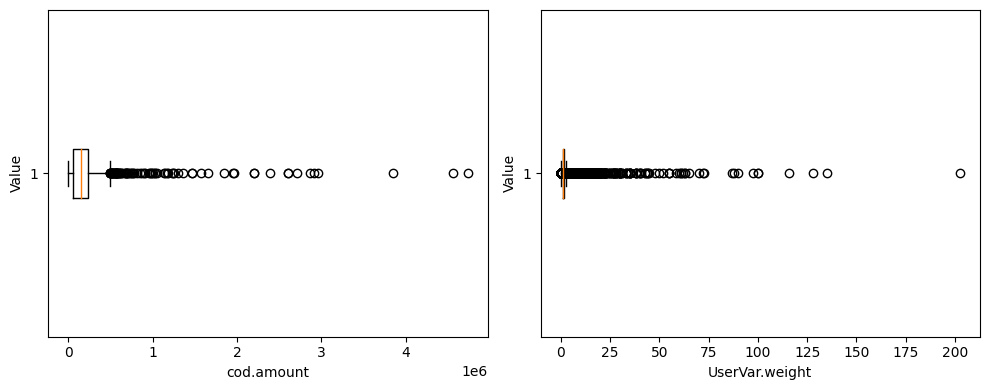

In [ ]:
import matplotlib.pyplot as plt

# Create a list of column names
columns = ['cod.amount', 'UserVar.weight']

# Create subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(10, 4))

# Iterate over the columns and create box plots
for i, column in enumerate(columns):
    axes[i].boxplot(df[column].dropna(), vert=False)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
outliers = {}

# Calculate and analyze outliers for each column
for column in ['cod.amount', 'UserVar.weight']:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    
    # Identify outliers
    column_outliers = df[(df[column] < lower_whisker) | (df[column] > upper_whisker)][column]
    outliers[column] = {
        'count': len(column_outliers),
        'proportion': len(column_outliers) / len(df)
    }

# Print the outlier information
for column, values in outliers.items():
    print(f"Column: {column}")
    print(f"Outlier Count: {values['count']}")
    print(f"Outlier Proportion: {values['proportion']}")
    print()


Column: cod.amount
Outlier Count: 85
Outlier Proportion: 0.010199184065274779

Column: UserVar.weight
Outlier Count: 1829
Outlier Proportion: 0.21946244300455964



Kemudian pada kolom cod.amount dan UserVar.weight, terlihat outliers pada masing-masing data (Outlier adalah data yang menyimpang secara ekstrim dari rata-rata sekumpulan data yang ada). Data pada kolom cod.amount memiliki outliers yang kecil sebesar 1 persen sedangakan pada kolom UserVar.weight sebesar 20 persen. Sehingga data tersebut perlu dilakukan pertimbangan lebih lanjut apabila ingin digunakan untuk melakukan pembuatan pemodelan algoritma dan semacamnya yang bersangkutan.

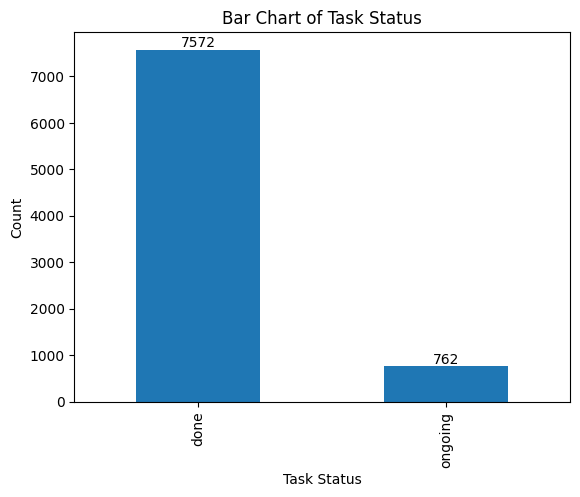

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the count of each task status
task_status_counts = df['taskStatus'].value_counts()

# Plot the bar chart
ax = task_status_counts.plot.bar()

# Adding labels and title
plt.xlabel('Task Status')
plt.ylabel('Count')
plt.title('Bar Chart of Task Status')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Add bar values
for i, count in enumerate(task_status_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Display the plot
plt.show()


Grafik batang di atas adalah perbandingan jumlah status task yang sudah di selesaikan dan sedang berjalan.

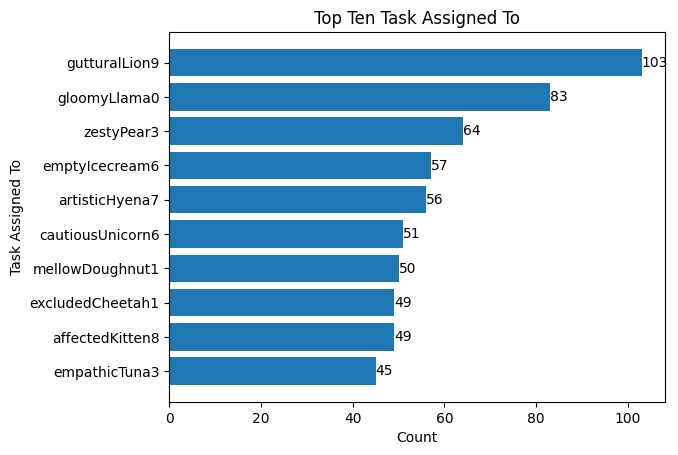

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the count of task assigned to
task_assigned_counts = df['taskAssignedTo'].value_counts().nlargest(10).sort_values(ascending=True)

# Plot the horizontal bar chart
plt.barh(task_assigned_counts.index, task_assigned_counts.values)

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Task Assigned To')
plt.title('Top Ten Task Assigned To')

# Add bar values (count) to the chart
for i, count in enumerate(task_assigned_counts.values):
    plt.text(count, i, str(count), ha='left', va='center')

# Display the plot
plt.show()


Terlihat sepuluh profil yang paling banyak mendapatkan tugas

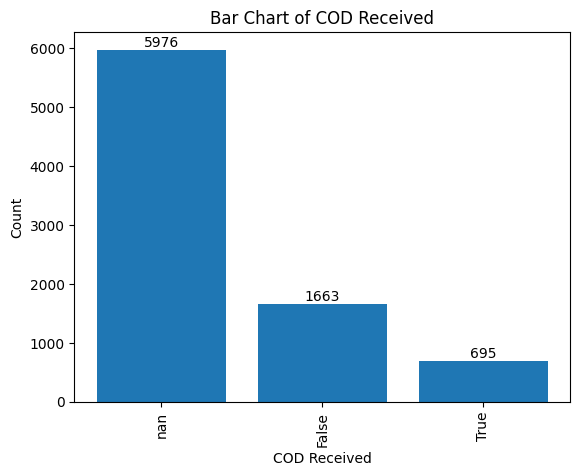

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in 'cod.received' column
cod_received_counts = df['cod.received'].value_counts()

# Plot the bar chart
plt.bar(cod_received_counts.index, cod_received_counts.values)

# Add bar values as annotations
for i, count in enumerate(cod_received_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('COD Received')
plt.ylabel('Count')
plt.title('Bar Chart of COD Received')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()


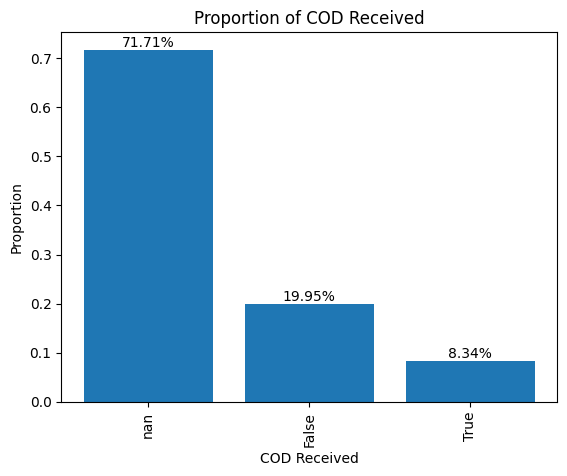

In [ ]:
import matplotlib.pyplot as plt

# Calculate the proportions of each unique value in 'cod.received' column
cod_received_proportions = df['cod.received'].value_counts(normalize=True)

# Plot the bar chart
plt.bar(cod_received_proportions.index, cod_received_proportions.values)

# Add bar values as annotations
for i, proportion in enumerate(cod_received_proportions.values):
    plt.text(i, proportion, f"{proportion:.2%}", ha='center', va='bottom')

# Adding labels and title
plt.xlabel('COD Received')
plt.ylabel('Proportion')
plt.title('Proportion of COD Received')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()


Lalu pada grafik di atas terlihat hanya sebesar 71.71% user tidak memilih menggunakan COD dan sisanya menggunakan COD. Sementara sebanyak 8% yang memilih COD sudah berhasil diterima oleh kurir sedangkan sisanya 19.95% belum diterima.

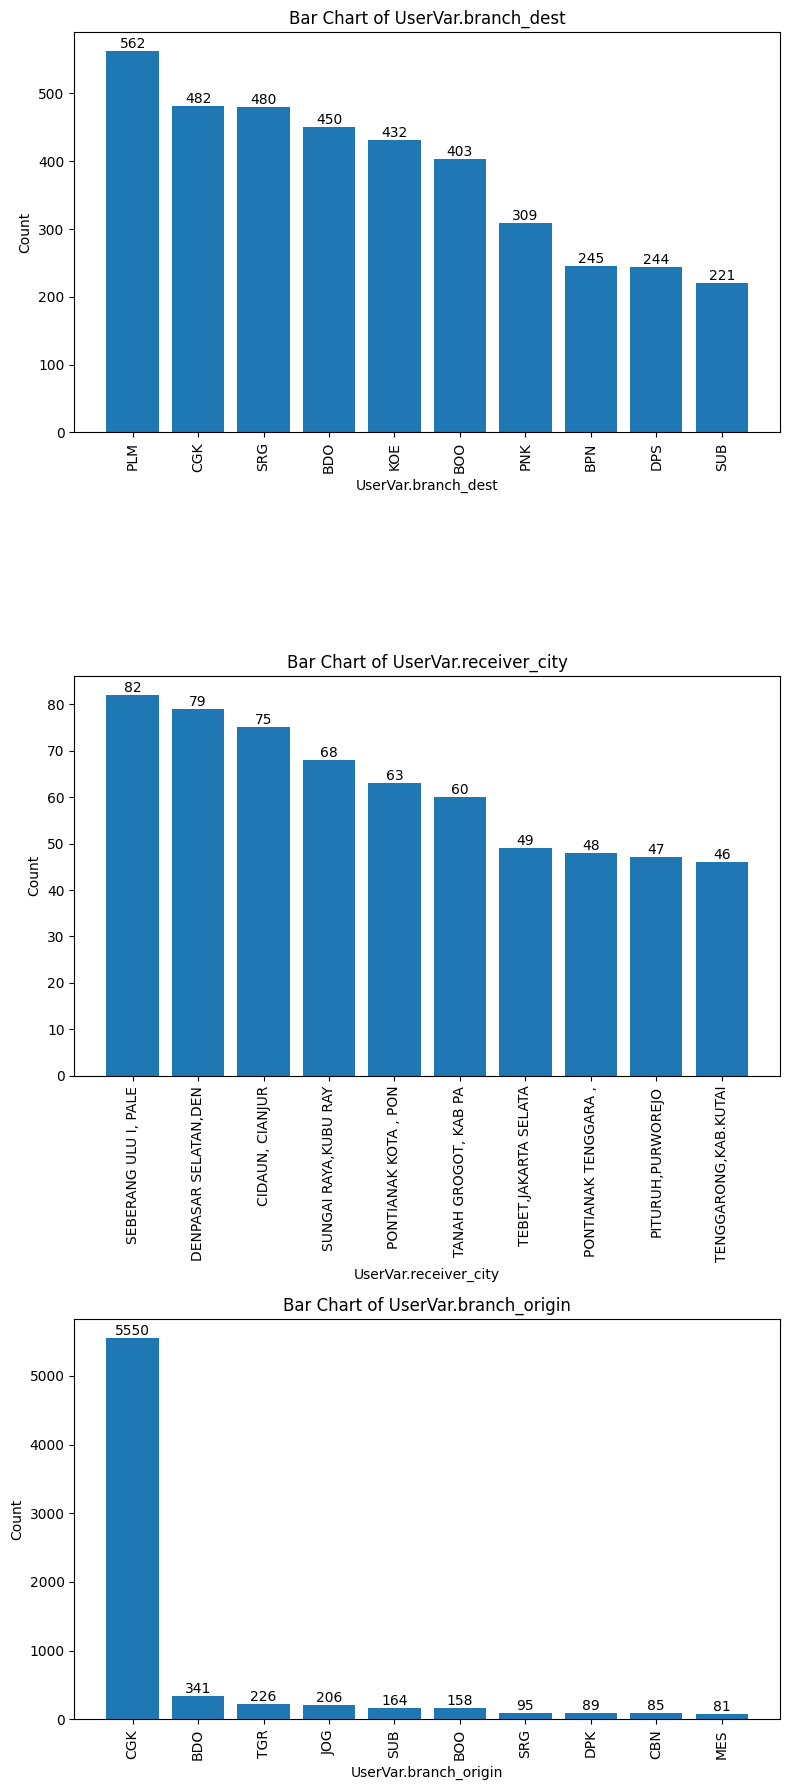

In [ ]:
import matplotlib.pyplot as plt

# Define the columns for which you want to create bar charts
columns = ['UserVar.branch_dest', 'UserVar.receiver_city', 'UserVar.branch_origin']

# Create subplots to accommodate multiple bar charts
fig, axs = plt.subplots(len(columns), 1, figsize=(8, 6 * len(columns)))

# Iterate over the columns and create a bar chart for each one
for i, column in enumerate(columns):
    # Calculate the value counts for the current column
    counts = df[column].value_counts()

    # Limit the number of bars to 10
    counts = counts[:10]

    # Create a bar chart
    axs[i].bar(counts.index, counts.values)

    # Add bar values as annotations
    for j, count in enumerate(counts.values):
        axs[i].text(j, count, str(count), ha='center', va='bottom')

    # Adding labels and title for each subplot
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Bar Chart of {column}')

    # Rotate x-axis labels if needed
    axs[i].tick_params(axis='x', rotation=90)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


Kemudian berikutnya adalag visualisasi untuk top 10 masing-masing branch destination & origin dan receiver city. Terlihat branch origin paling banyak yakni dengan kode CGK (Cengkareng) dan branch destination dengan kode PLM (Palembang).

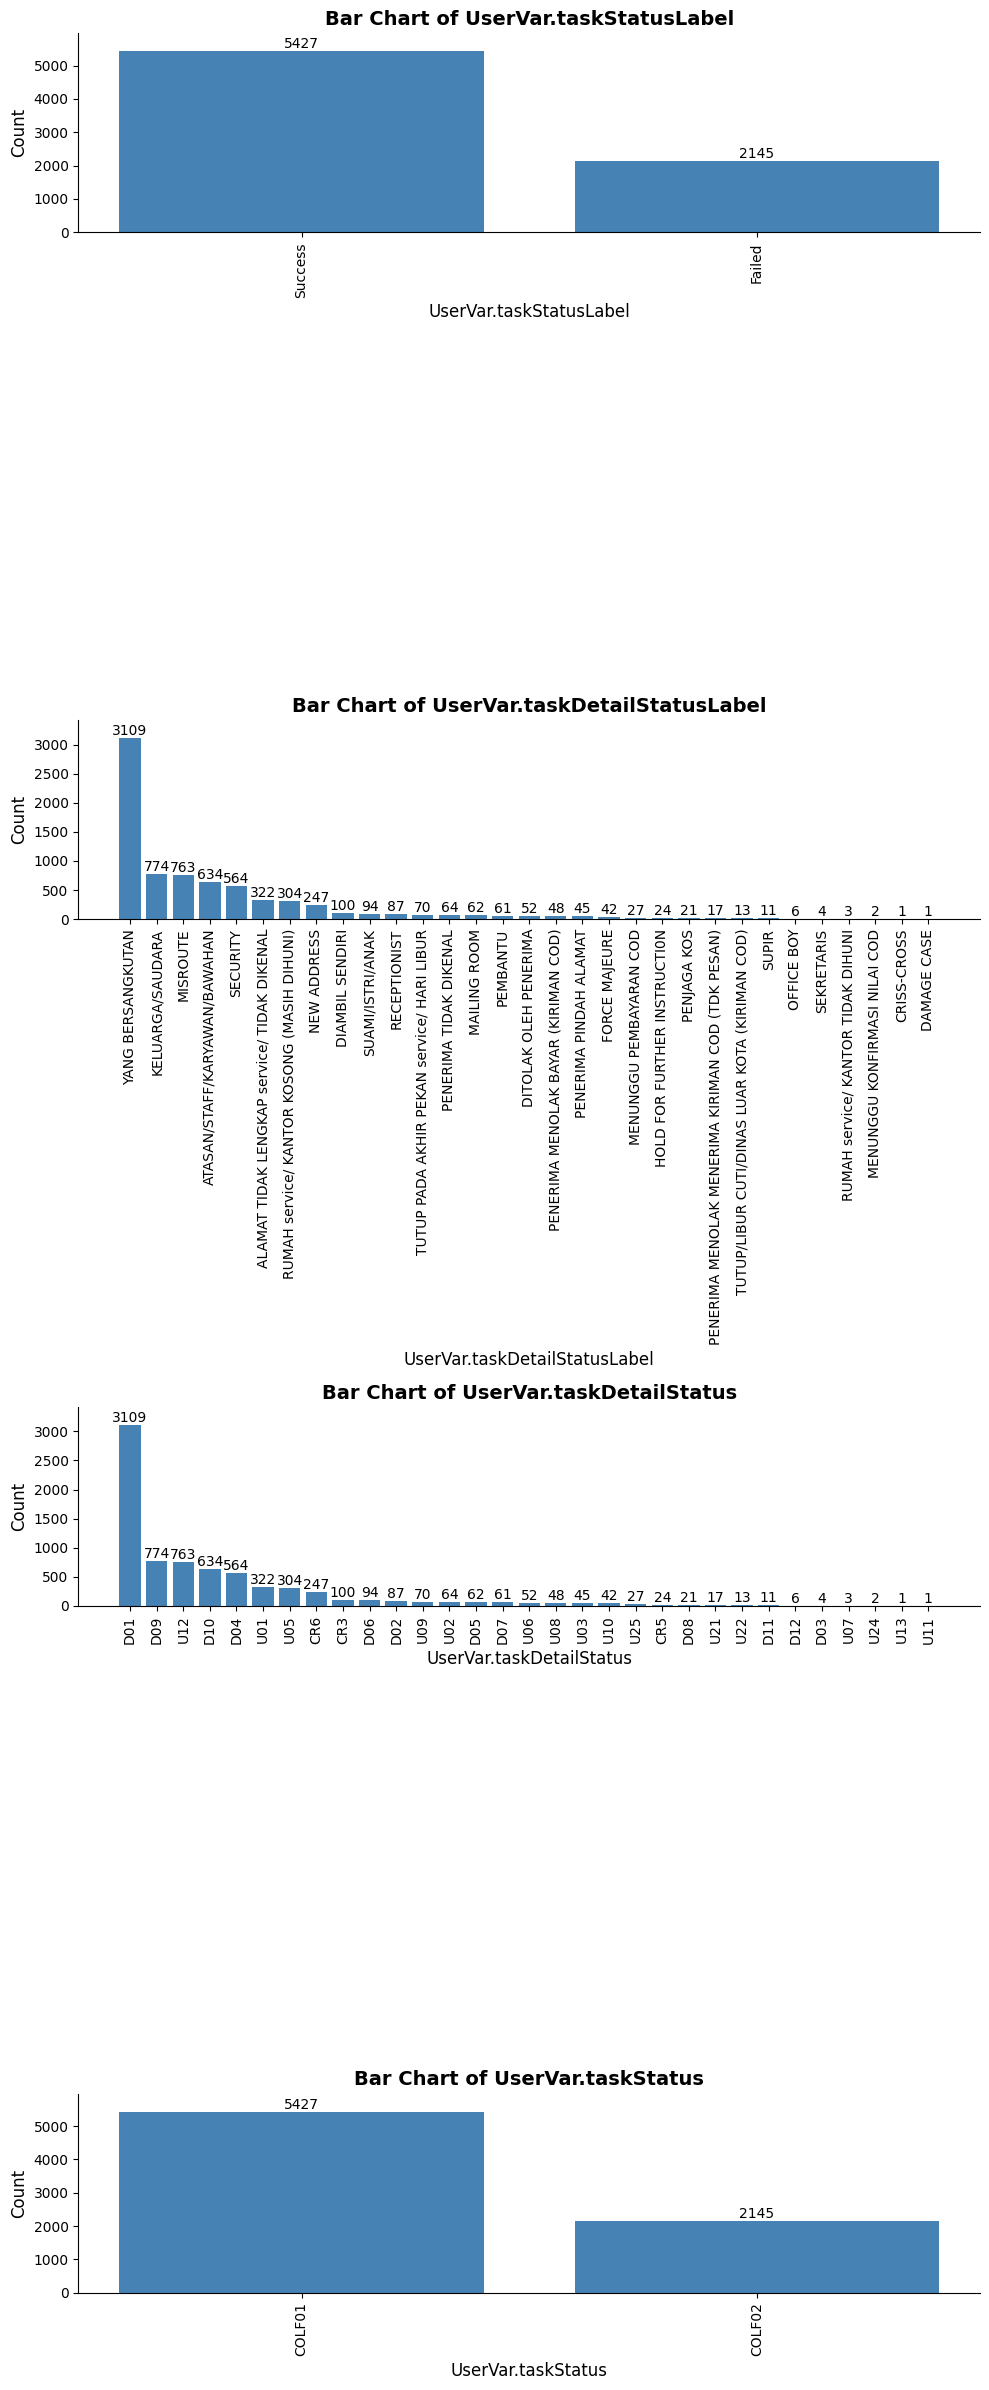

In [ ]:
import matplotlib.pyplot as plt

# Define the columns for which you want to create bar charts
columns = ['UserVar.taskStatusLabel', 'UserVar.taskDetailStatusLabel', 'UserVar.taskDetailStatus', 'UserVar.taskStatus']

# Create subplots to accommodate multiple bar charts
fig, axs = plt.subplots(len(columns), 1, figsize=(10, 6 * len(columns)))

# Iterate over the columns and create a bar chart for each one
for i, column in enumerate(columns):
    # Calculate the value counts for the current column
    counts = df[column].value_counts()

    # Create a bar chart
    axs[i].bar(counts.index, counts.values, color='steelblue')

    # Add bar values as annotations
    for j, count in enumerate(counts.values):
        axs[i].text(j, count, str(count), ha='center', va='bottom', fontsize=10)

    # Set y-axis limit for better visibility of bars and annotations
    axs[i].set_ylim(0, counts.max() * 1.1)

    # Adding labels and title for each subplot
    axs[i].set_xlabel(column, fontsize=12)
    axs[i].set_ylabel('Count', fontsize=12)
    axs[i].set_title(f'Bar Chart of {column}', fontsize=14, fontweight='bold')

    # Rotate x-axis labels if needed
    axs[i].tick_params(axis='x', rotation=90, labelsize=10)

    # Remove spines (top and right) for a cleaner look
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


Grafik di atas menunjukkan 5427 task status label telah sukses dan 2145 telah gagal dengan masing-masing keterangan yang tertera pada grafik selanjutnya. Kemudian terdapat juga perhitungan untuk kode masing-masing task tersebut.

# **Olah data untuk machine learning**

In [27]:
import pandas as pd
import json
import pytz

# Load the JSON file into a DataFrame
with open('/content/data-sample.json', 'r') as file:
    data = json.load(file)
df = pd.json_normalize(data)

# Changed dtype
df['taskCreatedTime'] = pd.to_datetime(df['taskCreatedTime'])
df['taskCompletedTime'] = pd.to_datetime(df['taskCompletedTime'], utc=True)
timezone_offset = pytz.FixedOffset(7 * 60)  # +7:00 offset in minutes
df['taskCompletedTime'] = df['taskCompletedTime'].dt.tz_convert(timezone_offset)
df['UserVar.weight'] = df['UserVar.weight'].astype(float)

# Clean Data
df.loc[df['cod.amount'].isnull(), 'cod.received'] = 'Not COD'
df['cod.amount'] = df['cod.amount'].fillna(0)
df['cod.amount'] = df['cod.amount'].astype(int)
df = df.dropna()

# Make Duration Task Collumn
df['taskDuration'] = df['taskCompletedTime'] - df['taskCreatedTime']

<ipython-input-27-4ee5bd7c894d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['taskDuration'] = df['taskCompletedTime'] - df['taskCreatedTime']


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7244 entries, 0 to 8333
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype                                
---  ------                         --------------  -----                                
 0   taskCreatedTime                7244 non-null   datetime64[ns, pytz.FixedOffset(420)]
 1   taskAssignedTo                 7244 non-null   object                               
 2   taskCompletedTime              7244 non-null   datetime64[ns, pytz.FixedOffset(420)]
 3   taskStatus                     7244 non-null   object                               
 4   flow                           7244 non-null   object                               
 5   taskId                         7244 non-null   object                               
 6   taskLocationDone.lon           7244 non-null   float64                              
 7   taskLocationDone.lat           7244 non-null   float64                        

In [29]:
df

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus,taskDuration
0,2022-11-01 20:17:26+07:00,pacifiedLion0,2022-11-01 20:46:30+07:00,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13.000,CGK,COLF01,0 days 00:29:04
1,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 12:33:48+07:00,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.300,CGK,COLF01,0 days 03:52:41
2,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 13:41:57+07:00,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3.000,CGK,COLF01,0 days 05:00:50
3,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 18:18:19+07:00,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01,0 days 09:37:12
4,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 10:51:49+07:00,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3.000,CGK,COLF01,0 days 02:10:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,2022-11-10 09:07:12+07:00,debonairPonie1,2022-11-10 09:38:04+07:00,done,Delivery,501af4e040a742e9e878,0.000000,0.000000,0,Not COD,CGK,Success,"PALMERAH ,JAKARTA BA",ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1.000,CGK,COLF01,0 days 00:30:52
8330,2022-11-10 09:21:42+07:00,murkyThrushe3,2022-11-10 09:37:52+07:00,done,Delivery,5cc952d9e9f8066dbf24,110.352054,-7.892571,0,Not COD,JOG,Failed,KOTA BANTUL,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL,U01,1.000,TGR,COLF02,0 days 00:16:10
8331,2022-11-10 09:36:44+07:00,enragedCake7,2022-11-10 09:37:55+07:00,done,Delivery,1b136b5a3c60749eb571,105.664897,-5.359063,0,Not COD,TKG,Success,MARGA SEKAMPUNG KAB.,YANG BERSANGKUTAN,D01,1.440,CGK,COLF01,0 days 00:01:11
8332,2022-11-10 07:25:40+07:00,lyingPaella2,2022-11-10 09:37:53+07:00,done,Delivery,e92e813c8539080c922e,119.877173,-8.513305,151000,False,KOE,Failed,"KOMODO,LABUAN BAJO",PENERIMA PINDAH ALAMAT,U03,0.600,CGK,COLF02,0 days 02:12:13


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target variable (y)
X = df.drop(['UserVar.taskStatusLabel', 'cod.received'], axis=1)  # Features
y = df['UserVar.taskStatusLabel']  # Target variable

# Preprocess the data
# Example: Encoding categorical features
encoder = LabelEncoder()
X_encoded = X.apply(encoder.fit_transform)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Choose a classification algorithm and train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluate the model's performance
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


Pada code di atas Saya telah mencoba membuat machine learning menggunakan algoritma decision tree untuk mengklasifikasikan sumber data yang ada ke dalam prediksi pada kolom UserVar.taskStatusLabel yakni Success atau Failed. Terlihat hasil akurasi pada code diatas didapat sebesar 100% menandakan training dan test pada algoritma tersebut menggunakan data yang ada sangat baik dan berjalan sukses.